# Finding the Best Two Markets for Advertising

### Aspiring Web and Mobile Developer's Countries and Budgets for Learning. 
Our company, E-learning Inc., is an imaginary company that offers on-line, English language courses on programing. Most our courses are on web and mobile development, with some additional material geared towards data science, game development, and general programming. Our company sells subscriptions at a price of $59 per month; so, we want to make sure we effectively advertise to those with the appropriate budgets for learning.

Since we want to budget some of our advertising dollars towards new coders, within two geographical, English language speaking markets, we first need to understand:

- What countries are the majority of these new coders located?
- How much money are new coders willing to spend on e-courses? 

### Sample Representation of Target Population
Since our budget does not include an elaborate survey, we'll be exploring existing data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/) to find out if we can use it as a sample to represent our target population. If so, we'll use it for our analysis.

### Dataquest Project Scope
*This project is for the completion of the DataQuest.io https://www.dataquest.io/ "Statistics Fundamentals" module; the sixteenth in a series for the completing Data Science course path. For this assignment, questions will be answered using the material focused on up to this point in the course, with particular consideration for the new material introduced in this module.*

- *How to summarize distributions using the mean, the median, and the mode.*
- *How to measure the variability of a distribution using the range, the mean absolute deviation, the variance, and the standard deviation.*
- *How to locate any value in a distribution using z-scores.*

### Results Summary
Over 80% of participant respondents were interested in web development, and 33% were interested in mobile development. This was a large enough sample to represent our target population. We chose the United States and India as our first and second markets, because they were the two largest markets and were willing to spend over $59 per month on learning. 

## Data Source and Exploration

 [FreeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis. The raw survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). 
 
The dataset for the survey contained 18175 rows and 136 columns, but we only needed a few of them for our purposes. Here are the definitions for the columns of interest: 

|Column|Description|
|:---- |:-----|
|CountryLive|Country the participant was living when they took the survey|
|JobRoleInterest| The participants job aspirations|
|MoneyForLearning| The participants budget for learning|
|MonthsProgramming|How many months the participant had been learning when they took the survey|

For the JobRoleInterest column, we dropped the rows participants didn't answer, because we can't know for sure what their interests are, so it was better to leave those out. After the initial cleaning, we were left with 6992 rows from the original 18175. 

In [45]:
# Import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [46]:
# read in the truncated version of the FreeCodeCamp survey
data = pd.read_csv('modified_survey_data_copy.csv')

In [47]:
survey = pd.read_csv('modified_survey_data_copy.csv', index_col= [0])
survey.head()

,CountryLive,JobRoleInterest,MoneyForLearning,MonthsProgramming
0,Canada,NaN,150.0,6.0
1,United States of America,Full-Stack Web Developer,80.0,6.0
2,United States of America,"Front-End Web Developer, Back-End Web Develo...",1000.0,5.0
3,Brazil,"Front-End Web Developer, Full-Stack Web Deve...",0.0,5.0
4,Portugal,"Full-Stack Web Developer, Information Security...",0.0,24.0


In [48]:
# Find number of rows and columns
survey.shape

(18175, 4)

In [49]:
# Remove null values in the 'JobRollInterest' column and remaining number of rows and columns in dataset
survey = survey[survey['JobRoleInterest'].notnull()]
survey.shape

(6992, 4)

## Determining Sample Representation of the Target Population
Survey participants were asked to select one or more combinations of any of the following job rolls, or none at all:

- JobInterestBackEnd:  Back-End Web Developer	
- JobInterestDataEngr: Data Engineer
- JobInterestDataSci: Data Scientist	
- JobInterestDevOps: 	DevOps / SysAdmin
- JobInterestFrontEnd: Front-End Web Developer
- JobInterestFullStack: Full-Stack Web Developer	
- JobInterestGameDev: Game Developer
- JobInterestInfoSec: Information Security	
- JobInterestMobile: Mobile Development 	
- JobInterestOther: Other	
- JobInterestProjMngr: Project Manager
- JobInterestQAEngr: Quality Assurance Engineer	
- JobInterestUX: Unix

The analysis showed that 83% of participants selected some sort of Web Development career, while 33% selected Mobile Development. 13.7% did not select either one. The bar plot below gives a visual representation of the results. 
The results gave us confidence that this sample was a good representation of our target population. We decided to proceed with the analysis further. 

In [50]:
# Create relative frequency distribution of "JobRoleInterest"
job_roll = survey['JobRoleInterest'].value_counts(normalize = True).to_frame()*100

In [51]:
web = job_roll[job_roll.index.str.contains('Web')]
web_sum = web.sum()[0]
print('Percent of participants that selected some sort of web development: {:.2f}%'.format(web_sum))

Percent of participants that selected some sort of web development: 82.67%


In [52]:
mobile = job_roll[job_roll.index.str.contains('Mobile')]
mobile_sum = mobile.sum()[0]
print('Percent of participants that selected mobile development: {:.2f}%'.format(mobile_sum))

Percent of participants that selected mobile development: 32.95%


In [53]:
filt1 = ~(job_roll.index.str.contains('Web'))
filt2 = ~(job_roll.index.str.contains('Mobile'))
other = job_roll[filt1 & filt2]
other_sum = other.sum()[0]
print('Percent of participants that selected something other than mobile or web development: {:.2f}%'.format(other_sum))

Percent of participants that selected something other than mobile or web development: 13.70%


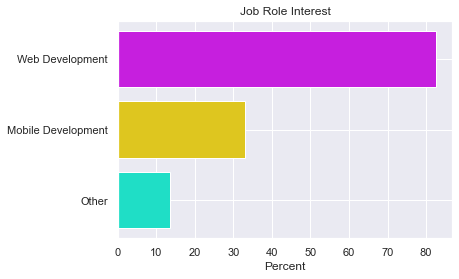

In [54]:
# Plot the results
d = {'Web Development': 82.665904, 'Mobile Development': 32.951945, 'Other': 13.701373}
plt.barh(*zip(*d.items()), color = ('#C61FDE', '#DEC61F', '#1FDEC6'))
plt.xlabel('Percent')
plt.title('Job Role Interest')
plt.ylabel('')
plt.gca().invert_yaxis()

## Largest Geographical Markets
The United States, India, United Kingdom and Canada had the highest frequency distributions of counties where participates resided when they took the survey. Our courses are written in English, which is a major language spoken in all four countries. 

In [55]:
# Find top four markets based on absolute frequencies
survey['CountryLive'].value_counts().head(4)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Name: CountryLive, dtype: int64

In [56]:
# Find top found markets based on relative frequencies
survey['CountryLive'].value_counts(normalize = True).head(4)

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Name: CountryLive, dtype: float64

In [57]:
# Create new dataframe with the top four counties, drop NaN values
top_4_c = survey.copy()
country_list=['United States of America', 'India','United Kingdom','Canada']
top_4_c = survey[survey['CountryLive'].isin(country_list)]
top_4_c = top_4_c.dropna()
top_4_c.head()

,CountryLive,JobRoleInterest,MoneyForLearning,MonthsProgramming
1,United States of America,Full-Stack Web Developer,80.0,6.0
2,United States of America,"Front-End Web Developer, Back-End Web Develo...",1000.0,5.0
6,United Kingdom,Full-Stack Web Developer,0.0,12.0
15,United States of America,Full-Stack Web Developer,0.0,1.0
16,United States of America,Full-Stack Web Developer,200.0,12.0


## How Much are New Coders Willing to Spend

We evaluated the MoneyForLearning column to determine whether students in the top geographical markets would be willing to pay the $59/month subscription price for our courses. This column is the amount of money spent in American dollars by participants from the moment they started coding until the moment they completed the survey.  Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To find the monthly amount they were willing to spend, we replaced all the 0s with 1s, so as not to divide by 0. Null values were also removed from the CountryLive column to tidy the data. 

The results were aggregated by the mean and plotted; but, our initial plot showed that there were several outliers that needed to be contended with. First, on the low-end, rows where MoneyPerMonthLearning were < or = $59 were dropped. Then Z-Score were used to determine the outliers on the high-end.  We used Z-Score = 1 indicating 1 standard deviations above the mean, as our criteria for dropping rows. 

In [58]:
# Replace MonthsPrograming entries with 1s where there are 0s
top_4_c['MonthsProgramming'].replace({0.0:1.0}, inplace = True)

In [59]:
# Create new column 'MoneyPerMonthLearning' by dividing'MoneyForLearning' by 'MonthsProgramming'
top_4_c = top_4_c.copy()
top_4_c['MoneyPerMonthLearning'] = top_4_c['MoneyForLearning']/top_4_c['MonthsProgramming']
top_4_c['MoneyPerMonthLearning'] = top_4_c['MoneyPerMonthLearning'].round(2)

In [60]:
# Group by country and aggregate by mean
survey_grp = top_4_c.groupby(['CountryLive'])
survey_grp['MoneyPerMonthLearning'].agg(['mean'])

,mean
CountryLive,
Canada,113.510958
India,135.101102
United Kingdom,45.534337
United States of America,227.998023


<AxesSubplot:xlabel='CountryLive', ylabel='MoneyPerMonthLearning'>

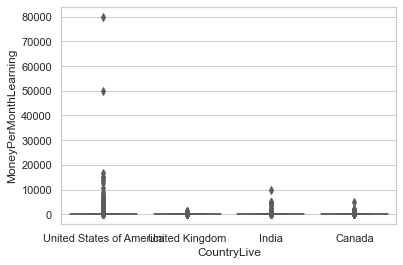

In [61]:
# Plot to visualize the outliers
sns.set_theme(style="whitegrid")
sns.boxplot(x = top_4_c['CountryLive'], y= top_4_c['MoneyPerMonthLearning'], palette = 'hls')

In [62]:
# Add Z Scores column to the table
top_4_c['Z_Scores'] = ''
z_for_c = {}
for country in top_4_c['CountryLive']:
    z = (top_4_c['MoneyPerMonthLearning'] - top_4_c['MoneyPerMonthLearning'].mean()) / np.std(top_4_c['MoneyPerMonthLearning'])
top_4_c['Z_Scores'] = z
top_4_c.head()

,CountryLive,JobRoleInterest,MoneyForLearning,MonthsProgramming,MoneyPerMonthLearning,Z_Scores
1,United States of America,Full-Stack Web Developer,80.0,6.0,13.33,-0.107980
2,United States of America,"Front-End Web Developer, Back-End Web Develo...",1000.0,5.0,200.00,0.001770
6,United Kingdom,Full-Stack Web Developer,0.0,12.0,0.00,-0.115817
15,United States of America,Full-Stack Web Developer,0.0,1.0,0.00,-0.115817
16,United States of America,Full-Stack Web Developer,200.0,12.0,16.67,-0.106016


In [63]:
# Create new dataframe with Z_scores <1, and MoneyPerMonthLearning >= $59
no_outliers_US = top_4_c[(top_4_c['CountryLive'] == 'United States of America') & (top_4_c['Z_Scores']< 1)]
no_outliers_India = top_4_c[(top_4_c['CountryLive'] == 'India') & (top_4_c['Z_Scores']<1) ]
no_outliers_UK = top_4_c[(top_4_c['CountryLive'] == 'United Kingdom') & (top_4_c['Z_Scores']<1) ]
no_outliers_Canada = top_4_c[(top_4_c['CountryLive'] == 'Canada') & (top_4_c['Z_Scores']<1) ]
no_outliers = pd.concat([no_outliers_US,no_outliers_India,no_outliers_UK, no_outliers_Canada ])
no_outliers.head()

,CountryLive,JobRoleInterest,MoneyForLearning,MonthsProgramming,MoneyPerMonthLearning,Z_Scores
1,United States of America,Full-Stack Web Developer,80.0,6.0,13.33,-0.107980
2,United States of America,"Front-End Web Developer, Back-End Web Develo...",1000.0,5.0,200.00,0.001770
15,United States of America,Full-Stack Web Developer,0.0,1.0,0.00,-0.115817
16,United States of America,Full-Stack Web Developer,200.0,12.0,16.67,-0.106016
18,United States of America,"Full-Stack Web Developer, Front-End Web Deve...",500.0,14.0,35.71,-0.094822


<AxesSubplot:xlabel='CountryLive', ylabel='MoneyPerMonthLearning'>

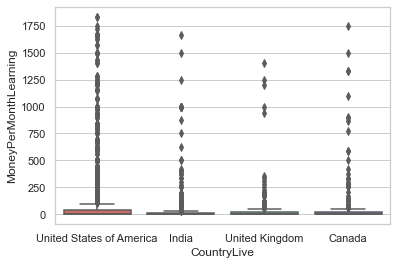

In [64]:
# Plot to visualize the result
sns.set_theme(style="whitegrid")
sns.boxplot(x = no_outliers['CountryLive'], y= no_outliers['MoneyPerMonthLearning'], palette = 'hls')

In [65]:
# Recalculate the mean after removing the outliers
survey_grp2 = no_outliers.groupby(['CountryLive'])
survey_grp2['MoneyPerMonthLearning'].agg(['mean'])

,mean
CountryLive,
Canada,75.550464
India,57.256725
United Kingdom,45.534337
United States of America,82.847753


## Finding the Best Two Markets
The United States is clearly the best market to advertise in.  45.7% of the survey participants were living there, making it the dominate geographical population.  With and average of \\$83 per month it was also the country where new coders were willing to spend the most money to learn. But what about the second market? It wasn't as clear because, although Canada was willing to spend an average of \\$75 per month learning, they were only 4% of the sampled group. India on the other hand was 7.7% of the population, but were only willing to spend an average of \\$57 per month learning. Knowing there was still a spread even after removing many outliers,  we decided rather than taking an average, it would be better to isolate Canada and India.  Then, count exactly how many of the survey respondents would be willing to spend more than \\$59 per month on our subscription. 
37 respondents from Canada would and 67 from India would.  Therefore, India was determined to be the second best market to advertise in. 

In [66]:
# Determine how many Canadian respondents would pay at least $59
Canada_59 = no_outliers[(no_outliers['CountryLive'] == 'Canada') & (no_outliers['MoneyPerMonthLearning'] >= 59)].count()[0]
print('{} Canadian respondents would pay at least $59/month on learning'.format(Canada_59))

37 Canadian respondents would pay at least $59/month on learning


In [67]:
# Determine how many Canadian respondents would pay at least $59
India_59 = no_outliers[(no_outliers['CountryLive'] == 'India') & (no_outliers['MoneyPerMonthLearning'] >= 59)].count()[0]
print('{} Indian respondents would pay at least $59/month on learning'.format(India_59))

67 Indian respondents would pay at least $59/month on learning


## Conclusion
Our E-Learning company was looking for a sampling of data to represent a population of new coders interested in the web and mobile development courses we offer for \\$59 per month. We found freeCodeCamp's 2017 New Coder Survey to be a good representation for our analysis because 83\% of respondents were interested in web development and 14\% were interested in mobile development. After cleaning the data, and removing outliers, we determined that the two best geographical markets to advertise in were the United States and India. 46\% of the survey participants resided in the United States and it was where new coders budgeted the most money for learning. India wasn't the obvious 2nd choice because; although, it had a larger population, Canadian respondents were willing to spend more money for learning. Since there were a lot of outliers, and a broad range of responses for what people were willing to spend, we simply counted how many participants were willing to spend over \$59 per month on learning. This took into account the populations of both regions. 37 respondents from Canada would, and 67 from India would. Therefore, India was determined to be the second best market to advertise in.  